ZAD 1. Zrealizować operację filtracji barwnego obrazu cyfrowego.
Do realizacji zadania wykorzystać obrazy zaszumione (szumem gaussowskim oraz impulsowym).
Każdy z obrazów wejściowych poddać przetwarzaniu filtrem wygładzającym (Gaussa) i filtrem
medianowym. Każdy obraz wynikowy wyświetlić i obliczyć dla niego PSNR (w stosunku do obrazu
oryginalnego, nie zaszumionego!, funkcja do obliczania PSNR dostępna jest w przykładowym
skrypcie). Ocenić działanie filtrów dla masek o rozmiarach: 3x3, 5x5, 7x7.
Zebrać w tabeli PSNR dla różnych rodzajów szumów, filtrów i rozmiarów maski.
Jaki wpływ na skuteczność filtracji i na zniekształcenie obrazu ma rozmiar maski filtru?
Czy ocena subiektywna uzyskanych obrazów wynikowych, jest zgodna z PSNR (lepsza jakość –
większy PSNR)?

In [67]:
# Import the necessary packages and initialize the list of reference
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

images_dir = "images/"
image = cv2.imread(images_dir+"sailboats_col.png", cv2.IMREAD_UNCHANGED)
image_noise = cv2.imread(images_dir+"sailboats_col_noise.png", cv2.IMREAD_UNCHANGED)
image_inoise1 = cv2.imread(images_dir+"sailboats_col_inoise1.png", cv2.IMREAD_UNCHANGED)

In [68]:
# Display image
def imshow(img, img_title="image"):
    if (img.dtype == np.float32) or (img.dtype == np.float64):
        img_ = img/255
    else:
        img_ = img

    cv2.imshow(img_title, img_)
    cv2.waitKey(0)           
    cv2.destroyAllWindows()

# Calculate PSNR
def calcPSNR(img1, img2):
    imax = 255.**2
    mse = ((img1.astype(np.float64)-img2)**2).sum()/img1.size
    return 10.0*np.log10(imax/mse)

In [69]:
os.makedirs("results1", exist_ok=True)

# Blur and save images for different map sizes 
def blur(image_noise, map_sizes, path_to_save):
    for map_size in map_sizes:
        gblur_img = cv2.GaussianBlur(image_noise, map_size, 0)
        cv2.imwrite(path_to_save+f"gblur{map_size}.png", gblur_img)

    for map_size in map_sizes:
        mblur_img = cv2.medianBlur(image_noise, map_size[0])
        cv2.imwrite(path_to_save+f"mblur{map_size}.png", mblur_img)

map_sizes = [(3, 3), (5, 5), (7, 7)]
blur(image_noise, map_sizes, "./results1/1_")
blur(image_inoise1, map_sizes, "./results1/2_")

ZAD. 2 Zrealizować operację wyrównania histogramu dla obrazu barwnego i zapisać obraz wynikowy do
pliku. UWAGA: operację wyrównania histogramu należy wykonać wyłącznie dla składowej
odpowiadającej za jasność, w tym celu należy wejściowy obraz RGB skonwertować do innej
przestrzeni (np. YCbCr/YUV), a po wyrównaniu histogramu dla właściwej składowej powrócić do
pierwotnego formatu.
Porównać uzyskane obrazy i ich histogramy (w szczególności: histogram dla składowej, dla której
wykonano operację wyrównywania histogramu).

True

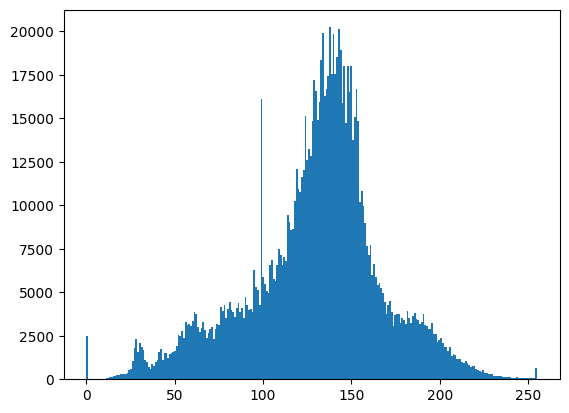

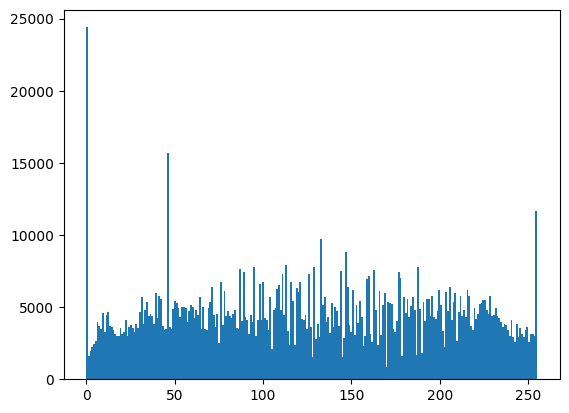

In [70]:
os.makedirs("results2", exist_ok=True)

# Make a histogram of the original image and the equalized image
plt.figure()
image_hist = plt.hist(image.flatten(), 256, range=[0.0, 255.0])
plt.savefig("results2/image_hist.png")

plt.figure()
image_YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
image_YCrCb[:,:,0] = cv2.equalizeHist(image_YCrCb[:,:,0])
image_equ = cv2.cvtColor(image_YCrCb, cv2.COLOR_YCrCb2BGR)
image_equ_hist = plt.hist(image_equ.flatten(), 256, range=[0.0, 255.0])
plt.savefig("results2/image_equ_hist.png")

cv2.imwrite("results2/image_equ.png", image_equ)

ZAD. 3
Korzystając z filtru Laplace’a do wyznaczenia wysokoczęstotliwościowych składowych obrazu
dokonać wyostrzenia obrazu:
img_out = img_in + W*img_laplace.
Jaki jest wpływ wagi składowej wysokoczęstotliwościowej na postać obrazu wynikowego?
Dla jakich wartości tej wagi uzyskuje się dobre, przyjemne dla oka wyniki?
Uwaga: należy pamiętać, że wyostrzanie obrazu powoduje również uwydatnienie szumu w obrazie, w
niektórych przypadkach (niezbyt dobrej jakości obrazów oryginalnych) przydatne może być wstępne
wygładzenie obrazu filtrem dolnoprzepustowym (np. filtrem Gaussa).
Wskazówka: wykorzystać funkcję cv2.addWeighted() do sumowania obrazów i równoczesnej
konwersji wyniku do 8-bitowych liczb całkowitych z przedziału [0, 255].
Uwaga: ze względu na sposób wyliczania laplasjanu w bibliotece OpenCV w celu uzyskania
‘dobrych’ wyników należy odjąć ‘obraz wysokoczęstotliwościowy’, czyli zastosować ujemne
wartości wagi W.

In [71]:
os.makedirs("results3", exist_ok=True)

# Sharpen the image with different weights
image_gblur = cv2.GaussianBlur(image, (3, 3), 0)
image_lap = cv2.Laplacian(image_gblur, cv2.CV_64F)
image_lap = np.uint8(np.clip(np.abs(image_lap), 0, 255))

image_sharped1 = cv2.addWeighted(image, 1, image_lap, -0.5, 0)
image_sharped2 = cv2.addWeighted(image, 1, image_lap, -0.7, 0)
image_sharped3 = cv2.addWeighted(image, 1, image_lap, -0.3, 0)

cv2.imwrite("results3/image_sharped1.png", image_sharped1)
cv2.imwrite("results3/image_sharped2.png", image_sharped2)
cv2.imwrite("results3/image_sharped3.png", image_sharped3)


True